# Human Activity Classification using Machine Learning (Unsupervised & Supervised)
Course 4 Assignment

## Introduction & Objectives
The primary objective of this assignment is to build a model that predicts different activity types in a dataset. The modeling goals can be summarized as below:
1. Test and compare performance of Unsupervised Learning models (KMeans, DBSCAN)
2. Perform PCA and re-test Unsupervised Learning models from step 1
3. Based on results from steps 1 and 2, train a supervised learning model (LogisticRegression) to see if model performance increases

Although best prediction model is the ultimate goal, it is intended to find a model that also has a decent level of interpretability. The over alll 
The primary objective of this assignment is to apply different supervised learning techniques for predicting different classes in a dataset. Although best prediction model is the ultimate goal, it is intended to find a model that also has a decent level of interpretability. The overall process can be summarized as:
1. Select dataset and peform exploratory data analysis
2. Clean dataset, perform transformation and feature engineering if required
3. Build and test different model
4. Find a model that performs the best prediction on the holdout data

## Dataset
For this project, the Human Activity Recognition with Smartphones database will be used. This was built from the recordings of study participants performing activities of daily living while carrying a smartphone with embedded inertial sensors. Participants activities were classified into 6 different categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying. Each record in the dataset has:
1. Triaxial acceleration from the accelerometer (total acceleration)
2. Estimated body acceleration based on total acceleration
3. Triaxial Angular velocity from gyriscope
4. A 561-feature vector with time and frequency domain variables
5. Label for activity

<br> The target variable is Activity, in other words the objective is to predict the activity based on the available features. The dataset has 10,299 observations spread across 562 features (including activity, the target). The 561 feature columns are all of type float64, and Activity column is of type object. Laying and Standing activity class has the highest number of observations at 1944 and 1906 respectively, while walking_downstairs activity has the least amount of observations at 1406. Other aspects of the data will be dealt in the next section.
<br>
The dataset can be downloaded from: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data
rawdata = pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv', sep=',')
rawdata

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [4]:
rawdata.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

## Data exploration, cleaning and preprocessing
Process of data cleaning and exploration can be summarized as:
1. get list of feature and target columns
2. Encode Activity column using label encoder
3. Check feature column value range for scaling
4. Check for and transform skewed data

In [5]:
# Create copy of data
data = rawdata.copy()

# get feature columns
feature_cols = data.dtypes.index[data.dtypes == float]
target_col = 'Activity'

In [6]:
# Encode Activity column using label encoder
from sklearn.preprocessing import LabelEncoder

# Inititate encoder
labelencode = LabelEncoder()

# Transform
data[target_col] = labelencode.fit_transform(data[target_col])

In [7]:
# Check feature columns data range
data[feature_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",10299.0,0.017683,0.616188,-1.0,-0.493108,0.017192,0.536137,1.0
"angle(tBodyGyroJerkMean,gravityMean)",10299.0,-0.009219,0.484770,-1.0,-0.389041,-0.007186,0.365996,1.0
"angle(X,gravityMean)",10299.0,-0.496522,0.511158,-1.0,-0.817288,-0.715631,-0.521503,1.0
"angle(Y,gravityMean)",10299.0,0.063255,0.305468,-1.0,0.002151,0.182028,0.250790,1.0


In [8]:
# Min / Max range of feature columns and check for null values
(data[feature_cols].max() == 1).all(), (data[feature_cols].min() == -1).all(), data[feature_cols].isna().any().any()

(True, True, False)

It is evident from feature statistics, and confirmed that minimum value=-1 and max value=1 for all features. This implies that the data is already scaled and does not require further data scaling. Furthermore, the data does not have any null values.
<br> Activity class distribution:
<br> LAYING                1944
<br> STANDING              1906
<br> SITTING               1777
<br> WALKING               1722
<br> WALKING_UPSTAIRS      1544
<br> WALKING_DOWNSTAIRS    1406
<br> Since the activity classes do not have similar number of observations, the data might require up or down sampling. However, for the current dataset, no resampling is performed. Rather, the dataset is split while maintaining proportion of different classes in training and test samples. Furthermore, stratified sampling will be used in cross-validation to maintain the proportions. This is being done to generate a model that generalizes well without losing precious information from majority classes while downsampling or assigning higher weight towards minority class while upsampling. 

<AxesSubplot:>

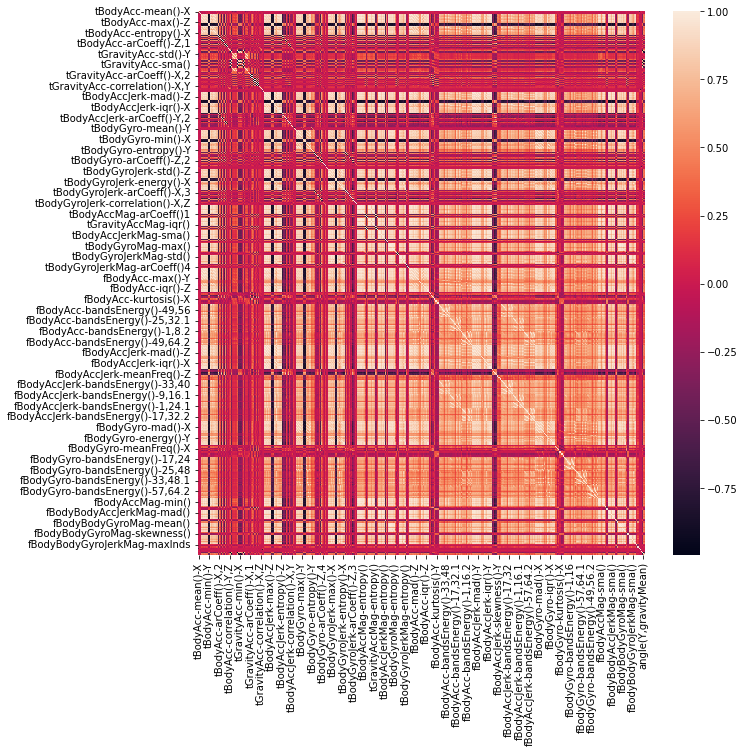

In [9]:
# Correlation map
fig, ax = plt.subplots(1, figsize=(10,10))
sns.heatmap(data[feature_cols].corr(), ax=ax)

<AxesSubplot:xlabel='abs_correlation', ylabel='Count'>

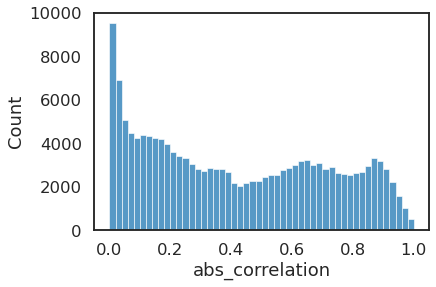

In [10]:
# Get correlations for a cleaner plot
corr_values = np.array(data[feature_cols].corr())

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make unsed values nan
corr_values[tril_index] = np.nan
corr_values = pd.DataFrame(corr_values, columns=feature_cols, index=feature_cols)

# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1', 'level_1':'feature2', 0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

# Plot data
sns.set_context('talk')
sns.set_style('white')
sns.histplot(data=corr_values, x='abs_correlation', bins=50)

The heatmap shows that apart from a couple of feature that have high positive or negative correlation, the dataset generalizes well. This is also evident from the histogram. Only a few features have absolute correlation > 0.75. Since there are 561 features, the influence of the highly correlated features might not strongly influence the model and should generalize well for a hold-out dataset. Furthermore, PCA analysis might help with this by lowering weight of these features.

## Classification Models
First we compare how KMeans and DBSCAN peforms

For each of the models, stratified K-Fold cross validation is used to get a good generalized model. The train-test split will be consistent between different models, and will be in 70% train, 30% test ratio.

In [11]:
# Split data
from sklearn.model_selection import StratifiedShuffleSplit

### KMeans

In [12]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

In [13]:
# Since we know there are 6 classes, the minimum test range would be from 2 clusters to 10 clusters
mbkm_runs = list()

for n in range(2, 40):
    mbkm = MiniBatchKMeans(n_clusters=n, init='k-means++', batch_size=200, random_state=50)
    
    mbkm.fit(data[feature_cols])
    
    preds = mbkm.predict(data[feature_cols])
    
    df = pd.concat([rawdata[['Activity']], pd.Series(preds, name='kmeans')], axis=1)
    
    mbkm_runs.append(pd.Series({'nclusters': n,
                                'inertia': mbkm.inertia_,
                                'model': mbkm,
                                'groups': df}))
    
mbkm_runs = pd.concat(mbkm_runs, axis=1).T
mbkm_runs = mbkm_runs.set_index('nclusters')
mbkm_runs

,inertia,model,groups
nclusters,,,
2,240893.56375,"MiniBatchKMeans(batch_size=200, n_clusters=2, ...",Activity kmeans 0 ...
3,220056.063474,"MiniBatchKMeans(batch_size=200, n_clusters=3, ...",Activity kmeans 0 ...
4,204037.830112,"MiniBatchKMeans(batch_size=200, n_clusters=4, ...",Activity kmeans 0 ...
5,188805.468208,"MiniBatchKMeans(batch_size=200, n_clusters=5, ...",Activity kmeans 0 ...
6,184347.595228,"MiniBatchKMeans(batch_size=200, n_clusters=6, ...",Activity kmeans 0 ...
7,178458.475423,"MiniBatchKMeans(batch_size=200, n_clusters=7, ...",Activity kmeans 0 ...
8,176481.902701,"MiniBatchKMeans(batch_size=200, random_state=50)",Activity kmeans 0 ...
9,171105.346046,"MiniBatchKMeans(batch_size=200, n_clusters=9, ...",Activity kmeans 0 ...
10,168566.771633,"MiniBatchKMeans(batch_size=200, n_clusters=10,...",Activity kmeans 0 ...


<AxesSubplot:xlabel='nclusters'>

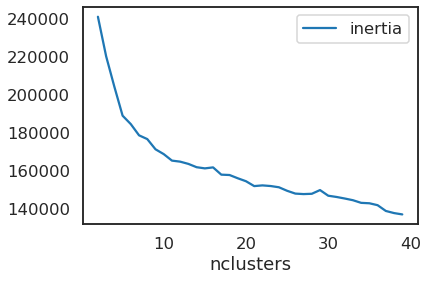

In [14]:
mbkm_runs[['inertia']].plot()

From the plot it is evident that the inertia is reducing with the increase in number of clusters. Although there is no visible elbow in the inertia plot, the inertia values itself show that the change in inertia is much more gradual after 10 clusters. Therefore, the optimal number of clusters for further processing will be set to 10.

### DBSCAN

In [15]:
from itertools import product

db_runs = list()

# Test different values for eps and n_samples
for eps, nsamp in product(np.arange(1, 12, 2), np.array([5, 10, 20, 50, 100, 150, 200, 300])):
    
    dbscan = DBSCAN(eps=eps, min_samples=nsamp, n_jobs=-1)
    
    dbscan.fit(data[feature_cols])
    
    db_runs.append(pd.Series({'eps': eps,
                              'n_clu': nsamp,
                              'labels': dbscan.labels_,
                              'model': dbscan}))

In [16]:
db_runs = pd.concat(db_runs, axis=1).T

In [17]:
# Get number of clusters DBSCAN found for each pair of eps and nsamp
nclusters = [db_runs[['labels']].iloc[i].values[0].max() + 2 for i in db_runs.index]

In [18]:
db_runs = pd.concat([db_runs, pd.Series(nclusters, name='nclusters')], axis=1)

In [19]:
db_runs['nclusters'].value_counts()

2     35
1     10
61     1
18     1
7      1
Name: nclusters, dtype: int64

In [20]:
db_runs[db_runs['nclusters'] > 5]

,eps,n_clu,labels,model,nclusters
8,3,5,"[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1...","DBSCAN(eps=3, n_jobs=-1)",61
9,3,10,"[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1...","DBSCAN(eps=3, min_samples=10, n_jobs=-1)",18
10,3,20,"[-1, -1, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0,...","DBSCAN(eps=3, min_samples=20, n_jobs=-1)",7


For the current dataset, DBSCAN clustering was tested for a range of epsilon and minimum number of samples in a neighborhood parameters. It was observed that DBSCAN performed poorly, classfying all data points as being an outlier or part of one cluster. In the above tests, for a certain pair of eps and n_clu, it classified all points as being outliers. For eps=3, it found 61 clusters for n_clu=5, and 18 clusters for n_clu=10, and 7 clusters for n_clu=20. Given that the dataset has 6 activity classes, it would be sensible to consider eps=3, and n_clu=10 for further analysis

### Create subset of data with KMeans and DBSCAN classification

In [21]:
from sklearn.preprocessing import OneHotEncoder

# Create datasets that have kmeans clusters and DBSCAN clusters as features
X_data = data[feature_cols]
y_data = data[target_col]

# KMeans & one hot encode
ohc = OneHotEncoder(categories='auto').fit_transform(mbkm_runs.loc[10, 'groups'][['kmeans']])
ohc = pd.DataFrame(ohc.toarray(),
                   columns=['kmeans_{}'.format(x) for x in range(mbkm_runs.loc[10, 'groups'][['kmeans']].min()[0], mbkm_runs.loc[10, 'groups'][['kmeans']].max()[0] + 1)])

X_data_kmeans = pd.concat([X_data, ohc], axis=1)
X_data_kmeans.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,kmeans_0,kmeans_1,kmeans_2,kmeans_3,kmeans_4,kmeans_5,kmeans_6,kmeans_7,kmeans_8,kmeans_9
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# DBSCAN & one hot encode
ohc = OneHotEncoder(categories='auto').fit_transform(db_runs[db_runs['nclusters'] == 7].labels.values[0].reshape(-1, 1))
ohc = pd.DataFrame(ohc.toarray(),
                   columns=['dbscan_{}'.format(x) for x in range(0, len(np.unique(db_runs[db_runs['nclusters'] == 7]['labels'].values[0])))])

X_data_dbscan = pd.concat([X_data, ohc], axis=1)
X_data_dbscan.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",dbscan_0,dbscan_1,dbscan_2,dbscan_3,dbscan_4,dbscan_5,dbscan_6
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.841247,0.179941,-0.058627,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.844788,0.180289,-0.054317,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.848933,0.180637,-0.049118,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.848649,0.181935,-0.047663,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.847865,0.185151,-0.043892,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Here two new datasets were created with clustering labels from KMeans and DBSCAN algorithms. With this feature engineering, X_data with Kmeans labels has 571 features and dbscan labels has 568 columns (excluding activity column).

### Logistic Regression with new datasets
Here we test logistic regression with preprocessed data, along with feature engineered data to test performance of model with new features that were created based on clustering algorithms. Furthermore, stratified Kfold will be used to cross-validate.

In [23]:
# Helper functions to plot
from colorsetup import colors, palette

def plot_cm(matrix, name):
    
    fig, ax = plt.subplots(1, figsize=(5,5))
    
    sns.heatmap(matrix, ax=ax, annot=True, fmt='d', cmap=colors, xticklabels=labelencode.classes_, yticklabels=labelencode.classes_)
    ax.set(title=name)
    
    return
    
def get_metrics(y_test, y_pred, name):
        
    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
    
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
                        label_binarize(y_pred, classes=[0,1,2,3,4,5]),
                        average='weighted')
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    df = pd.Series({'precision':precision,
               'recall':recall,
               'f1-score':fscore,
               'accuracy':accuracy,
               'auc':auc},
              name=name)
    
    # Plot confusion matrix
    plot_cm(cm, name)
    
    # Print classification report
    classification_report(y_pred, y_test)
    
    return df, cm

#### Raw Data

In [28]:
metrics = list()
con_matrix = {}

In [26]:
from sklearn.linear_model import LogisticRegressionCV

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=50)
train_idx, test_idx = next(strat_shuf_split.split(X_data, y_data))

# Raw data
Xtrain, Xtest = X_data.loc[train_idx], X_data.loc[test_idx]
ytrain, ytest = y_data.loc[train_idx], y_data.loc[test_idx]
    
LR = LogisticRegressionCV(random_state=50, solver='saga', class_weight='balanced', max_iter=1e4, penalty='l2', Cs=[14.], cv=3, n_jobs=-1)
LR.fit(Xtrain, ytrain)

LogisticRegressionCV(Cs=[14.0], class_weight='balanced', cv=3, max_iter=10000.0,
                     n_jobs=-1, random_state=50, solver='saga')

precision    0.984159
recall       0.984142
f1-score     0.984149
accuracy     0.984142
auc          0.990371
Name: Logistic_Regression, dtype: float64
-------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       580
           1       0.96      0.96      0.96       534
           2       0.96      0.96      0.96       572
           3       1.00      1.00      1.00       519
           4       1.00      1.00      1.00       422
           5       1.00      1.00      1.00       463

    accuracy                           0.98      3090
   macro avg       0.99      0.98      0.99      3090
weighted avg       0.98      0.98      0.98      3090



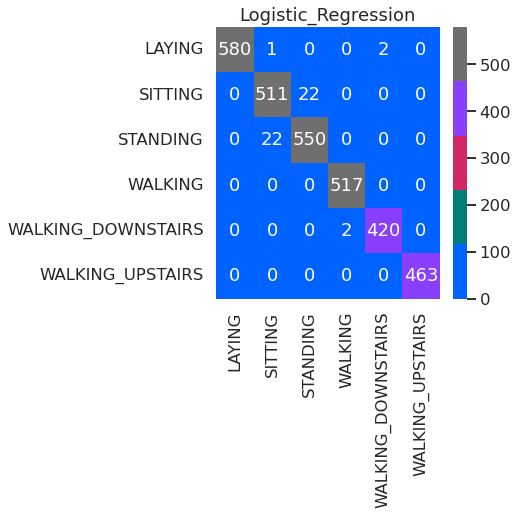

In [31]:
ypred = LR.predict(Xtest)

metric, cm = get_metrics(ytest, ypred, 'Logistic_Regression')
metrics.append(metric)
con_matrix['LR_raw'] = cm
print(metric)
print('-------------------------------')
print(classification_report(ypred, ytest))

#### Data with KMeans

precision    0.983834
recall       0.983819
f1-score     0.983825
accuracy     0.983819
auc          0.990172
Name: Logistic_Regression_kmeans, dtype: float64
-------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       580
           1       0.96      0.96      0.96       533
           2       0.96      0.96      0.96       573
           3       1.00      1.00      1.00       519
           4       1.00      1.00      1.00       422
           5       1.00      1.00      1.00       463

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



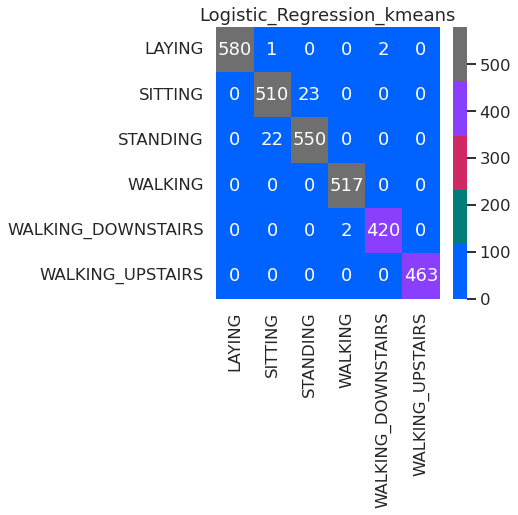

In [33]:
# Raw data
Xtrain, Xtest = X_data_kmeans.loc[train_idx], X_data_kmeans.loc[test_idx]
    
LR = LogisticRegressionCV(random_state=50, solver='saga', class_weight='balanced', max_iter=1e4, penalty='l2', Cs=[14.], cv=3, n_jobs=-1)
LR.fit(Xtrain, ytrain)

ypred = LR.predict(Xtest)

metric, cm = get_metrics(ytest, ypred, 'Logistic_Regression_kmeans')
metrics.append(metric)
con_matrix['LR_kmeans'] = cm
print(metric)
print('-------------------------------')
print(classification_report(ypred, ytest))

#### Data with DBSCAN

precision    0.984159
recall       0.984142
f1-score     0.984149
accuracy     0.984142
auc          0.990371
Name: Logistic_Regression_dbscan, dtype: float64
-------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       580
           1       0.96      0.96      0.96       534
           2       0.96      0.96      0.96       572
           3       1.00      1.00      1.00       519
           4       1.00      1.00      1.00       422
           5       1.00      1.00      1.00       463

    accuracy                           0.98      3090
   macro avg       0.99      0.98      0.99      3090
weighted avg       0.98      0.98      0.98      3090



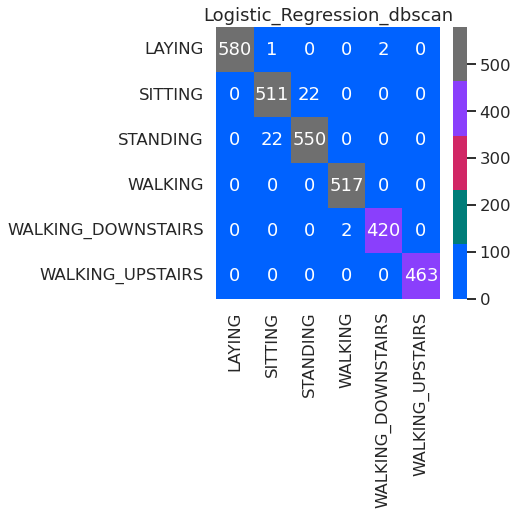

In [34]:
# Raw data
Xtrain, Xtest = X_data_dbscan.loc[train_idx], X_data_dbscan.loc[test_idx]
    
LR = LogisticRegressionCV(random_state=50, solver='saga', class_weight='balanced', max_iter=1e4, penalty='l2', Cs=[14.], cv=3, n_jobs=-1)
LR.fit(Xtrain, ytrain)

ypred = LR.predict(Xtest)

metric, cm = get_metrics(ytest, ypred, 'Logistic_Regression_dbscan')
metrics.append(metric)
con_matrix['LR_dbscan'] = cm
print(metric)
print('-------------------------------')
print(classification_report(ypred, ytest))

In the above three cases, Logistic Regression was performed with a regularization value of 14, and stratified K-Fold cross validation with 3 splits. The optimal regularization parameter was determined in Course 3 assignment using GridSearchCV. It can be seen that Logistic Regression model performs exceptionally well when predicting the activity type from a hold out dataset. The model seems to struggle between Sitting and Standing classes. However, the precision and recall scores for these two classes are quite high > 0.96, which indicates that the model is performing exceptionally well.
<br>
However, there is no significant improvement in classification when the Logistic Regression model is supplemented by clusters from KMeans and DBSCAN algorithms. This implies that for the current dataset Logistic Regression on its own performs well without the need for additional features.

### Logistic Regression along with PCA

#### Principal Component Analysis

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

strat_shuf_split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=50)

def get_avg_score(n, X, y):
    pipe = [('pca', PCA(n_components=n)),
            ('estimator', LogisticRegressionCV(random_state=50, solver='saga', class_weight='balanced', max_iter=1e4, penalty='l2', Cs=[14.], cv=3, n_jobs=-1))]
    
    pipe = Pipeline(pipe)
    
    scores = []
    
    for train_index, test_index in strat_shuf_split.split(X,y):
        Xtrain, Xtest = X.loc[train_index], X.loc[test_index]
        ytrain, ytest = y.loc[train_index], y.loc[test_index]
        
        pipe.fit(Xtrain, ytrain)
        
        scores.append(accuracy_score(ytest, pipe.predict(Xtest)))
    
    return np.mean(scores)

In [ ]:
pca_comps = [10, 20, 50, 100, 150, 200, 300, 400]

pca_scores = {}

for dataset, model in zip([X_data, X_data_kmeans, X_data_dbscan], ['raw', 'kmeans', 'dbscan']):
    pca_scores[model] = [get_avg_score(n, dataset, y_data) for n in pca_comps]

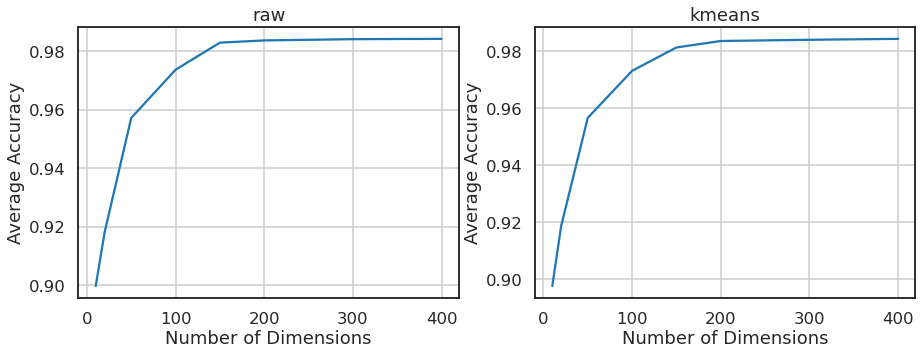

In [47]:
sns.set_context('talk')

fig, axs = plt.subplots(1, 2, figsize=(15,5))

for ax, label in zip(axs, ['raw', 'kmeans']):
    ax.plot(pca_comps, pca_scores[label])
    ax.set(xlabel='Number of Dimensions',
           ylabel='Average Accuracy',
           title=label)
    ax.grid(True)

#### Model with ideal number of features from PCA
It is evident from that 150 features are sufficient to achieve an accuracy score of > 0.98. Therefore, for the next part of the analysis all three versions of the datasets will be reduced to 200 features to compute confusion matrices to check model performance

-------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       580
           1       0.96      0.95      0.96       537
           2       0.96      0.96      0.96       569
           3       1.00      0.99      1.00       520
           4       0.99      1.00      0.99       421
           5       1.00      1.00      1.00       463

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090

-------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       581
           1       0.95      0.95      0.95       535
           2       0.96      0.96      0.96       570
           3       1.00      1.00      1.00       518
           4       1.00      0.99      0.99       423
           5       1.00      1.00      1.00       463

    accuracy 

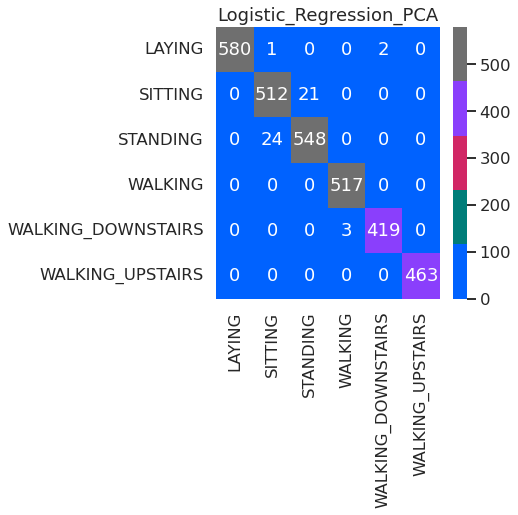

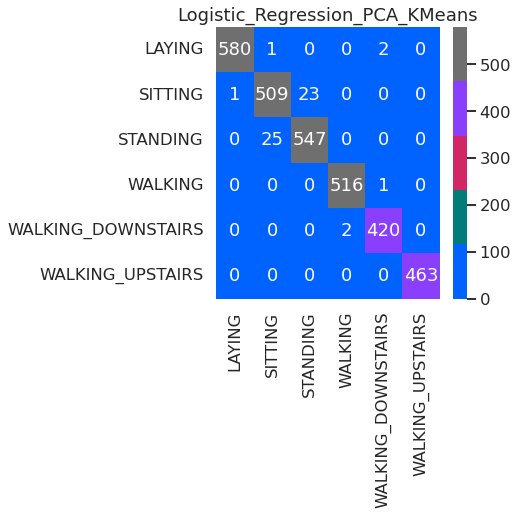

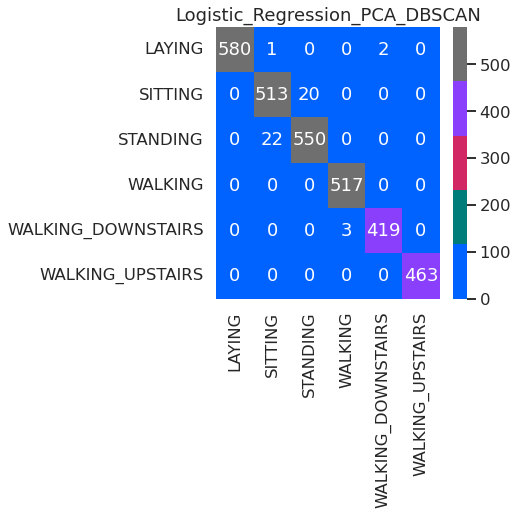

In [48]:
optimal_comps = 200

pipe = Pipeline([('pca', PCA(n_components=optimal_comps)),
        ('estimator', LogisticRegressionCV(random_state=50, solver='saga', class_weight='balanced', max_iter=1e4, penalty='l2', Cs=[14.], cv=3, n_jobs=-1))])

# Raw data
Xtrain, Xtest = X_data.loc[train_idx], X_data.loc[test_idx]

pipe.fit(Xtrain, ytrain)
ypred = pipe.predict(Xtest)

_, _ = get_metrics(ytest, ypred, 'Logistic_Regression_PCA')
print('-------------------------------')
print(classification_report(ypred, ytest))


# KMEANS
Xtrain, Xtest = X_data_kmeans.loc[train_idx], X_data_kmeans.loc[test_idx]

pipe.fit(Xtrain, ytrain)
ypred = pipe.predict(Xtest)

_, _ = get_metrics(ytest, ypred, 'Logistic_Regression_PCA_KMeans')
print('-------------------------------')
print(classification_report(ypred, ytest))


# DBSCAN
Xtrain, Xtest = X_data_dbscan.loc[train_idx], X_data_dbscan.loc[test_idx]

pipe.fit(Xtrain, ytrain)
ypred = pipe.predict(Xtest)

_, _ = get_metrics(ytest, ypred, 'Logistic_Regression_PCA_DBSCAN')
print('-------------------------------')
print(classification_report(ypred, ytest))

#### Feature Importance

In [55]:
feature_weight_list = list()

def get_feature_importance(comps, Xdata):
    
    pca = PCA(n_components=comps)
    pca.fit(Xdata)

    # Extra code from lecture
    weights = pca.explained_variance_ratio_.reshape(-1, 1) / pca.explained_variance_ratio_.sum()
    overall_contribution = np.abs(pca.components_) * weights
    abs_feature_values = overall_contribution.sum(axis=0)

    return pd.DataFrame({'features': Xdata.columns,
                  'values': abs_feature_values / abs_feature_values.sum()})


feature_importances = list()

feature_importances.append(get_feature_importance(optimal_comps, X_data.loc[train_idx]))
feature_importances.append(get_feature_importance(optimal_comps, X_data_kmeans.loc[train_idx]))
feature_importances.append(get_feature_importance(optimal_comps, X_data_dbscan.loc[train_idx]))

In [66]:
print('Top 5 Features with highest importance in raw data')
feature_importances[0].sort_values('values', ascending=False).head()

Top 5 Features with highest importance in raw data


,features,values
366,fBodyAccJerk-entropy()-X,0.005116
287,fBodyAcc-entropy()-X,0.005019
367,fBodyAccJerk-entropy()-Y,0.004987
234,tBodyAccJerkMag-entropy(),0.004952
260,tBodyGyroJerkMag-entropy(),0.004880


In [67]:
print('Top 5 Features with highest importance in data with kmeans')
feature_importances[1].sort_values('values', ascending=False).head()

Top 5 Features with highest importance in data with kmeans


,features,values
366,fBodyAccJerk-entropy()-X,0.005030
287,fBodyAcc-entropy()-X,0.004924
367,fBodyAccJerk-entropy()-Y,0.004867
234,tBodyAccJerkMag-entropy(),0.004856
260,tBodyGyroJerkMag-entropy(),0.004794


In [68]:
print('Top 5 Features with highest importance in data with dbscan')
feature_importances[2].sort_values('values', ascending=False).head()

Top 5 Features with highest importance in data with dbscan


,features,values
366,fBodyAccJerk-entropy()-X,0.005082
287,fBodyAcc-entropy()-X,0.004990
367,fBodyAccJerk-entropy()-Y,0.004954
234,tBodyAccJerkMag-entropy(),0.004923
260,tBodyGyroJerkMag-entropy(),0.004846


## Summary & Conclusion

Experimentation with the current dataset suggests that Logistic Regression is the best model for predicting the activity class given the data from various sensors. Logistic regression model has an accuracy of 98%. It can also be inferred that for the current dataset, feature engineering by generating new features with cluster labels from KMeans and DBSCAN provided little improvement to the prediction at the cost of increasing number of features, i.e. to say that little improvement was found while the computation time increased due to more features.
<br>
However, Principal Component Analysis has shown that the Logistic Regression model achieves over 98% accuracy for 150 features. For features more than 150, the improvement in accuracy is less significant. While the precision and recall for classes 1 and 2 (standing and sitting), reduced on an average by 2% from 0.98 to 0.96, the reduction in precision and recall is not significant. This is because for these two classes, there is always some uncertainty in prediction even when using all 500+ features. This is likely due to spurious datapoints. But none the less, the accuracy of predicting the activity type using fewer features is promising, and suggests that a reliable prediction can be made at lower computation cost. Furthermore, experiments with raw data, data with kmeans labels and data with dbscan cluster labels, all have same top 5 features that are contributing significantly to the model.
<br>
As was noted in data description, the dataset has unbalanced classes. Although, it was found that for the given dataset using a Stratified sampling approach would be sufficient, further experimentation can be done by upsampling minority and downsampling majority classes, and retraining the models with a balanced dataset. Since the models are getting confused between Sitting and Standing classes, the models would also benefit from more observations.